### Linear Regression

🔸 Linear regression predicts a real value output based on the input value. 
* Simple linear regression only has one input/variable and we try to fit a line to best describe the output and input relationship
* Multiple linear regression has multiple variables as input and we try to fit a hyperplane instead.

🔸 A example of simple linear regression is salary prediction, with the salary as output, and years of working experience as input variable.

🔸 The algorithm can be used for simple linear regression or multiple linear regression, and in this notebook, it will be implemented for simple linear regression with both gradient descent and normal equation method.

🔸 In this notebook, the linear regression algorithm is coded step by step following:

<img src="code_steps.png"/> 

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Coding the algorithm

In [2]:
class LinearRegression():
    def __init__(self, x, y):
        x0 = np.ones(x.shape) # add the bias term
        x = np.append(x0, x, axis=1) # append the bias to the input variable
        self.x = x
        self.y = y
        self.m = x.shape[0]
        self.n = x.shape[1]
        self.theta = np.random.randn(self.n) # initialize the weights with random numbers
        
    def CostFunction(self):
        self.h = np.matmul(self.x, self.theta) # calculate the hypothesis h = x*theta
        self.J = (1/(2*self.m))*np.sum((self.h-self.y)**2) # cost function
        return self.h, self.J
    
    def GradientDescent(self, epoch=10, alpha=0.01):
        self.cost_history = []
        self.theta_history = []
        for i in range(epoch):
            h, J = self.CostFunction()
            self.cost_history.append(J)
            self.theta_history.append(self.theta)
            self.theta = self.theta - alpha / self.m * np.dot(self.x.T, h-self.y)
        pass
    
    def Theta(self):
        return self.theta
    
    def CostHistory(self):
        return self.cost_history
    
    def ThetaHistory(self):
        return self.theta_history
    
    def predict(self, x_test, y_test):
        x0 = np.ones(x_test.shape)
        x_test = np.append(x0, x_test, axis=1)
        self.y_pred = np.matmul(x_test, self.theta)
        self.test_error = (abs(self.y_pred-y_test)/y_test)*100
        return self.y_pred, self.test_error
    
    def NormalEquationPredict(self, x_test, y_test):
        x0 = np.ones(x_test.shape)
        x_test = np.append(x0, x_test, axis=1)
        inv = np.linalg.inv(np.matmul(self.x.T, self.x))
        self.optimal_theta = np.matmul(np.matmul(inv, self.x.T), self.y)
        self.y_pred = np.matmul(x_test, self.optimal_theta)
        self.test_error = (abs(self.y_pred-y_test)/y_test)*100
        return self.y_pred, self.test_error, self.optimal_theta
            

In [ ]:
# feature scaling is not used in this notebook, coded for fun. 
class FeatureScaler():
    def __init__(self, x):
        self.x = x.copy().astype(float)
    def FitTransform(self):
        n = self.x.shape[1]
        for i in range(n):
            xi = self.x[:,i]
            xi_scaled = (xi - xi.mean()) / (xi.max() - xi.min())
            self.x[:,i] = xi_scaled
        return self.x

### Read data

In [3]:
df = pd.read_csv('Salary_Data.csv')
# shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
df.head()

,YearsExperience,Salary
0,9.6,112635.0
1,4.9,67938.0
2,8.2,113812.0
3,5.3,83088.0
4,3.2,64445.0


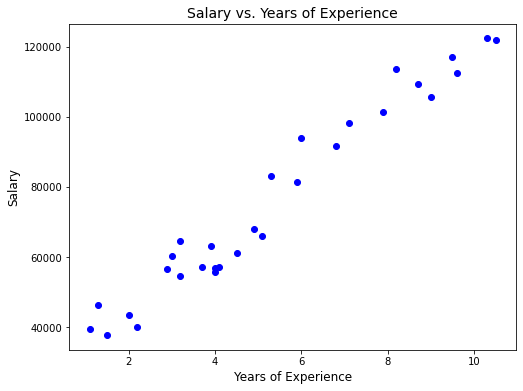

In [5]:
# visualize data
fig = plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c='b')
plt.title('Salary vs. Years of Experience', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

### Split data to train and test dataset

In [6]:
x = np.array(df.iloc[:,0:1])
y = np.array(df.iloc[:,1])

In [7]:
train_frac = 0.7
train_size = int(df.shape[0] * train_frac)
x_train = x[0:train_size,:]
y_train = y[0:train_size]
x_test = x[train_size:,:]
y_test = y[train_size:]

In [8]:
print ('training size is {}\ntest size is {}'.format(x_train.shape[0], x_test.shape[0]))

training size is 21
test size is 9


### Initialize the model

In [9]:
lr = LinearRegression(x_train, y_train)

### Predict using normal equation method

In [10]:

y_pred_train_NE, train_error_NE, optimal_theta = lr.NormalEquationPredict(x_train, y_train)
y_pred_test_NE, test_error_NE,_ = lr.NormalEquationPredict(x_test, y_test)
np.set_printoptions(formatter={'float': lambda x: "{0:0.01f}".format(x)})
print('y_test {}\n\ny_pred_test {}\n\ntest error (%) {}\n\noptimal theta {}'
      .format(y_test, y_pred_test_NE, test_error_NE, optimal_theta))

y_test [116969.0 81363.0 121872.0 91738.0 54445.0 63218.0 61111.0 93940.0 60150.0]

y_pred_test [115224.5 81135.1 124693.7 89657.4 55568.1 62196.6 67878.1 82082.0 53674.2]

test error (%) [1.5 0.3 2.3 2.3 2.1 1.6 11.1 12.6 10.8]

optimal theta [25266.4 9469.3]


### Predict using gradient descent method

In [11]:

epoch = 200
alpha = 0.05
lr.GradientDescent(epoch, alpha)
y_pred_train, train_error = lr.predict(x_train,y_train)
y_pred_test, test_error = lr.predict(x_test,y_test)
theta = lr.Theta()

In [12]:
# print the test data, predicted test data and the error
print('y_test {}\n\ny_pred_test {}\n\ntest error (%) {}\n\ntheta {}'
      .format(y_test, y_pred_test, test_error, theta))

y_test [116969.0 81363.0 121872.0 91738.0 54445.0 63218.0 61111.0 93940.0 60150.0]

y_pred_test [116148.1 80900.9 125939.0 89712.7 54465.4 61319.0 67193.6 81880.0 52507.2]

test error (%) [0.7 0.6 3.3 2.2 0.0 3.0 10.0 12.8 12.7]

theta [23134.5 9790.9]


### Visulize cost vs epochs

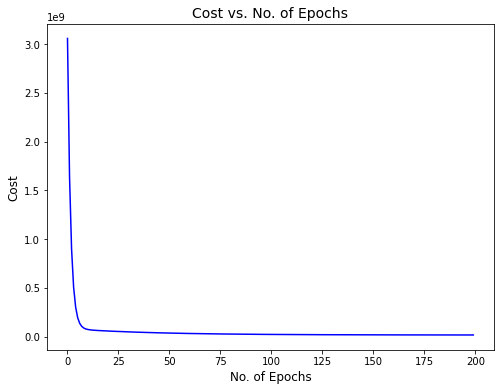

In [13]:
cost = lr.CostHistory()
fig = plt.figure(figsize=(8,6))
plt.plot(range(epoch), cost, c='b')
plt.title('Cost vs. No. of Epochs', fontsize=14)
plt.xlabel('No. of Epochs', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.show()

### Visulize fitted results using both method

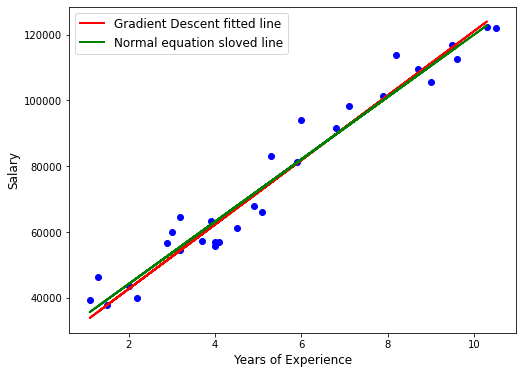

In [14]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c='b')
plt.plot(x_train, y_pred_train, c='r', lw=2)
plt.plot(x_train, y_pred_train_NE, c='g', lw=2)
plt.title('', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(['Gradient Descent fitted line','Normal equation sloved line'], fontsize=12)
plt.show()